# Problem Statement

1. Preliminary data inspection and cleaning
  - Perform preliminary data inspection, checking for data types, missing values, and duplicates
  - Remove any columns that might not be relevant for the analysis
2. Exploratory Data Analysis
  - Perform an in-depth exploratory data analysis on the number of events by date, per year, and per day for each state and country
  - Analyze the different aspects of the death events. For example:
    - What is the number of victims (deaths) in each accident?
    - How many times did tesla drivers die?
    - What is the proportion of events in which one or more occupants died?
    - What is the distribution of events in which the vehicle hit a cyclist or a pedestrian?
    - How many times did the accident involve the death of an occupant or driver of a Tesla along with a cyclist or pedestrian?
    - What is the frequency of Tesla colliding with other vehicles?
  - Study the event distribution across models
  - Check the distribution of verified Tesla autopilot deaths

## Preliminary data inspection and cleaning

> Import necessary libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


> Load data

In [3]:
df = pd.read_csv('/content/drive/MyDrive/PGC AIML/10. PGC AIML - Capstone/Assessment/Datasets/Capstone 1/Part 2/Tesla - Deaths.csv')
df.head()

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,...,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Unnamed: 16,Unnamed: 17,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
0,294.0,2022.0,1/17/2023,USA,CA,Tesla crashes into back of semi,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230118162813/ht...,NaN,NaN,NaN,NaN,NaN
1,293.0,2022.0,1/7/2023,Canada,-,Tesla crashes,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230109041434/ht...,NaN,Taren Singh Lal,NaN,NaN,NaN
2,292.0,2022.0,1/7/2023,USA,WA,"Tesla hits pole, catches on fire",1.0,-,1,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230107232745/ht...,NaN,NaN,NaN,NaN,NaN
3,291.0,2022.0,12/22/2022,USA,GA,Tesla crashes and burns,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,NaN,NaN,NaN,NaN,NaN
4,290.0,2022.0,12/19/2022,Canada,-,Tesla crashes into storefront,1.0,-,-,-,...,-,-,https://web.archive.org/web/20221223203725/ht...,https://web.archive.org/web/20221223203725/ht...,https://web.archive.org/web/20221223203725/ht...,NaN,NaN,NaN,NaN,NaN


### Perform preliminary data inspection, checking for data types, missing values, and duplicates

In [4]:
print(f"Total number of rows: {len(df)}")

Total number of rows: 307


> Convert `Date` to `DateTime` format

In [5]:
df['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 307 entries, 0 to 306
Series name: Date
Non-Null Count  Dtype 
--------------  ----- 
294 non-null    object
dtypes: object(1)
memory usage: 2.5+ KB


In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 307 entries, 0 to 306
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
294 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.5 KB


### Remove any columns that might not be relevant for the analysis

In [8]:
df.columns

Index(['Case #', 'Year', 'Date', ' Country ', ' State ', ' Description ',
       ' Deaths ', ' Tesla driver ', ' Tesla occupant ', ' Other vehicle ',
       ' Cyclists/ Peds ', ' TSLA+cycl / peds ', ' Model ',
       ' Autopilot claimed ', ' Verified Tesla Autopilot Deaths ',
       ' Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO ',
       'Unnamed: 16', 'Unnamed: 17', ' Source ', ' Note ', ' Deceased 1 ',
       ' Deceased 2 ', ' Deceased 3 ', ' Deceased 4 '],
      dtype='object')

In [9]:
drop_columns = ['Case #', 'Unnamed: 16', 'Unnamed: 17', ' Source ', ' Note ',
                ' Deceased 1 ', ' Deceased 2 ', ' Deceased 3 ', ' Deceased 4 ']
df.drop(columns=drop_columns, inplace=True)
df.head()

,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO
0,2022.0,2023-01-17,USA,CA,Tesla crashes into back of semi,1.0,1,-,-,-,1,-,-,-,-
1,2022.0,2023-01-07,Canada,-,Tesla crashes,1.0,1,-,-,-,1,-,-,-,-
2,2022.0,2023-01-07,USA,WA,"Tesla hits pole, catches on fire",1.0,-,1,-,-,1,-,-,-,-
3,2022.0,2022-12-22,USA,GA,Tesla crashes and burns,1.0,1,-,-,-,1,-,-,-,-
4,2022.0,2022-12-19,Canada,-,Tesla crashes into storefront,1.0,-,-,-,1,1,-,-,-,-


In [10]:
df.columns

Index(['Year', 'Date', ' Country ', ' State ', ' Description ', ' Deaths ',
       ' Tesla driver ', ' Tesla occupant ', ' Other vehicle ',
       ' Cyclists/ Peds ', ' TSLA+cycl / peds ', ' Model ',
       ' Autopilot claimed ', ' Verified Tesla Autopilot Deaths ',
       ' Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO '],
      dtype='object')

> Remove leading spaces in column names

In [11]:
for col in df.columns:
  df.rename(columns = {col:col.strip()}, inplace=True)

df.columns

Index(['Year', 'Date', 'Country', 'State', 'Description', 'Deaths',
       'Tesla driver', 'Tesla occupant', 'Other vehicle', 'Cyclists/ Peds',
       'TSLA+cycl / peds', 'Model', 'Autopilot claimed',
       'Verified Tesla Autopilot Deaths',
       'Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO'],
      dtype='object')

In [12]:
for col in df.columns[6:]:
  if(col != 'Model'):
    if(df[col].dtype == 'object'):
      df[col] = df[col].str.strip()
      df[col]  = df[col].replace('-', '0')
      df[col].fillna('0', inplace=True)
      df[col] = df[col].astype(int)

df.head()

,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO
0,2022.0,2023-01-17,USA,CA,Tesla crashes into back of semi,1.0,1,0,0,0,1,-,0,0,0
1,2022.0,2023-01-07,Canada,-,Tesla crashes,1.0,1,0,0,0,1,-,0,0,0
2,2022.0,2023-01-07,USA,WA,"Tesla hits pole, catches on fire",1.0,0,1,0,0,1,-,0,0,0
3,2022.0,2022-12-22,USA,GA,Tesla crashes and burns,1.0,1,0,0,0,1,-,0,0,0
4,2022.0,2022-12-19,Canada,-,Tesla crashes into storefront,1.0,0,0,0,1,1,-,0,0,0


> Columns of the data

In [13]:
df.columns

Index(['Year', 'Date', 'Country', 'State', 'Description', 'Deaths',
       'Tesla driver', 'Tesla occupant', 'Other vehicle', 'Cyclists/ Peds',
       'TSLA+cycl / peds', 'Model', 'Autopilot claimed',
       'Verified Tesla Autopilot Deaths',
       'Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO'],
      dtype='object')

> Data info

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 15 columns):
 #   Column                                                              Non-Null Count  Dtype         
---  ------                                                              --------------  -----         
 0   Year                                                                294 non-null    float64       
 1   Date                                                                294 non-null    datetime64[ns]
 2   Country                                                             294 non-null    object        
 3   State                                                               294 non-null    object        
 4   Description                                                         295 non-null    object        
 5   Deaths                                                              299 non-null    float64       
 6   Tesla driver                                              

> Check for missing values

In [15]:
df.isna().sum()

Year                                                                  13
Date                                                                  13
Country                                                               13
State                                                                 13
Description                                                           12
Deaths                                                                 8
Tesla driver                                                           0
Tesla occupant                                                         0
Other vehicle                                                          0
Cyclists/ Peds                                                         0
TSLA+cycl / peds                                                       0
Model                                                                 11
Autopilot claimed                                                      0
Verified Tesla Autopilot Deaths                    

> Check for `null` values

In [16]:
df.isnull().sum()

Year                                                                  13
Date                                                                  13
Country                                                               13
State                                                                 13
Description                                                           12
Deaths                                                                 8
Tesla driver                                                           0
Tesla occupant                                                         0
Other vehicle                                                          0
Cyclists/ Peds                                                         0
TSLA+cycl / peds                                                       0
Model                                                                 11
Autopilot claimed                                                      0
Verified Tesla Autopilot Deaths                    

In [17]:
df.drop(columns='Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO', inplace=True)

> Let's inspect column by column.

In [18]:
df.head()

,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths
0,2022.0,2023-01-17,USA,CA,Tesla crashes into back of semi,1.0,1,0,0,0,1,-,0,0
1,2022.0,2023-01-07,Canada,-,Tesla crashes,1.0,1,0,0,0,1,-,0,0
2,2022.0,2023-01-07,USA,WA,"Tesla hits pole, catches on fire",1.0,0,1,0,0,1,-,0,0
3,2022.0,2022-12-22,USA,GA,Tesla crashes and burns,1.0,1,0,0,0,1,-,0,0
4,2022.0,2022-12-19,Canada,-,Tesla crashes into storefront,1.0,0,0,0,1,1,-,0,0


In [19]:
df.columns

Index(['Year', 'Date', 'Country', 'State', 'Description', 'Deaths',
       'Tesla driver', 'Tesla occupant', 'Other vehicle', 'Cyclists/ Peds',
       'TSLA+cycl / peds', 'Model', 'Autopilot claimed',
       'Verified Tesla Autopilot Deaths'],
      dtype='object')

> Drop missing values

In [20]:
df.dropna(inplace=True)
df.isna().sum()

Year                               0
Date                               0
Country                            0
State                              0
Description                        0
Deaths                             0
Tesla driver                       0
Tesla occupant                     0
Other vehicle                      0
Cyclists/ Peds                     0
TSLA+cycl / peds                   0
Model                              0
Autopilot claimed                  0
Verified Tesla Autopilot Deaths    0
dtype: int64

In [21]:
print(f"Total number of rows after removing missing values: {len(df)}")

Total number of rows after removing missing values: 294


> Check for duplicates

In [22]:
print(f"Total number of duplicates: {df.duplicated().sum()}")

Total number of duplicates: 0


> Check data info once again

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Year                             294 non-null    float64       
 1   Date                             294 non-null    datetime64[ns]
 2   Country                          294 non-null    object        
 3   State                            294 non-null    object        
 4   Description                      294 non-null    object        
 5   Deaths                           294 non-null    float64       
 6   Tesla driver                     294 non-null    int64         
 7   Tesla occupant                   294 non-null    int64         
 8   Other vehicle                    294 non-null    int64         
 9   Cyclists/ Peds                   294 non-null    int64         
 10  TSLA+cycl / peds                 294 non-null    int64         
 11

> Convert columns to proper types

In [24]:
df['Year'] = df['Year'].astype(int)
df['Deaths'] = df['Deaths'].astype(int)

In [25]:
df['Year'].unique()

array([2022, 2020, 2021,  202, 2019, 2018, 2017, 2016, 2015, 2014, 2013])

In [26]:
df[df['Year'] == 202]

,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths
162,202,2020-09-17,USA,GA,"Car loses control, hits bus shelter",1,0,0,0,1,1,3,1,0


In [27]:
df['Year'].replace(202, 2020, inplace=True)

> Description of numerical data

In [28]:
df.describe()

,Year,Date,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Autopilot claimed,Verified Tesla Autopilot Deaths
count,294.000000,294,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,2020.034014,2020-08-04 05:18:22.040816384,1.200680,0.397959,0.163265,0.442177,0.156463,0.714286,0.129252,0.064626
min,2013.000000,2013-04-02 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019.000000,2019-08-26 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2021.000000,2021-03-11 12:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,2022.000000,2022-05-05 12:00:00,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,2022.000000,2023-01-17 00:00:00,4.000000,1.000000,3.000000,4.000000,2.000000,4.000000,2.000000,2.000000
std,2.075092,NaN,0.513171,0.490312,0.421938,0.651899,0.382210,0.666098,0.365250,0.284839


## Exploratory Data Analysis

### Perform an in-depth exploratory data analysis on the number of events by date, per year, and per day for each state and country

In [29]:
df.loc[:,"event_year"] = df['Date'].dt.year
df.loc[:,"event_month"] = df['Date'].dt.month
df.loc[:,"event_day"] = df['Date'].dt.day

df.head()

,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,event_year,event_month,event_day
0,2022,2023-01-17,USA,CA,Tesla crashes into back of semi,1,1,0,0,0,1,-,0,0,2023,1,17
1,2022,2023-01-07,Canada,-,Tesla crashes,1,1,0,0,0,1,-,0,0,2023,1,7
2,2022,2023-01-07,USA,WA,"Tesla hits pole, catches on fire",1,0,1,0,0,1,-,0,0,2023,1,7
3,2022,2022-12-22,USA,GA,Tesla crashes and burns,1,1,0,0,0,1,-,0,0,2022,12,22
4,2022,2022-12-19,Canada,-,Tesla crashes into storefront,1,0,0,0,1,1,-,0,0,2022,12,19


In [30]:
deaths_by_year = df.groupby('event_year').Deaths.sum()
deaths_by_month = df.groupby('event_month').Deaths.sum()
deaths_by_day = df.groupby('event_day').Deaths.sum()

In [31]:
# Function to plot events
def plot_bars(data, x_label, y_label, title, rows, cols, plot_num, color, fontsize):
  plt.subplot(rows, cols, plot_num)
  sns.barplot(x=x_label, y=y_label, data=data, color=color)
  plt.title(title, fontweight='bold', fontsize=fontsize)
  plt.xlabel(x_label, fontsize=fontsize)
  plt.ylabel(y_label, fontsize=fontsize)

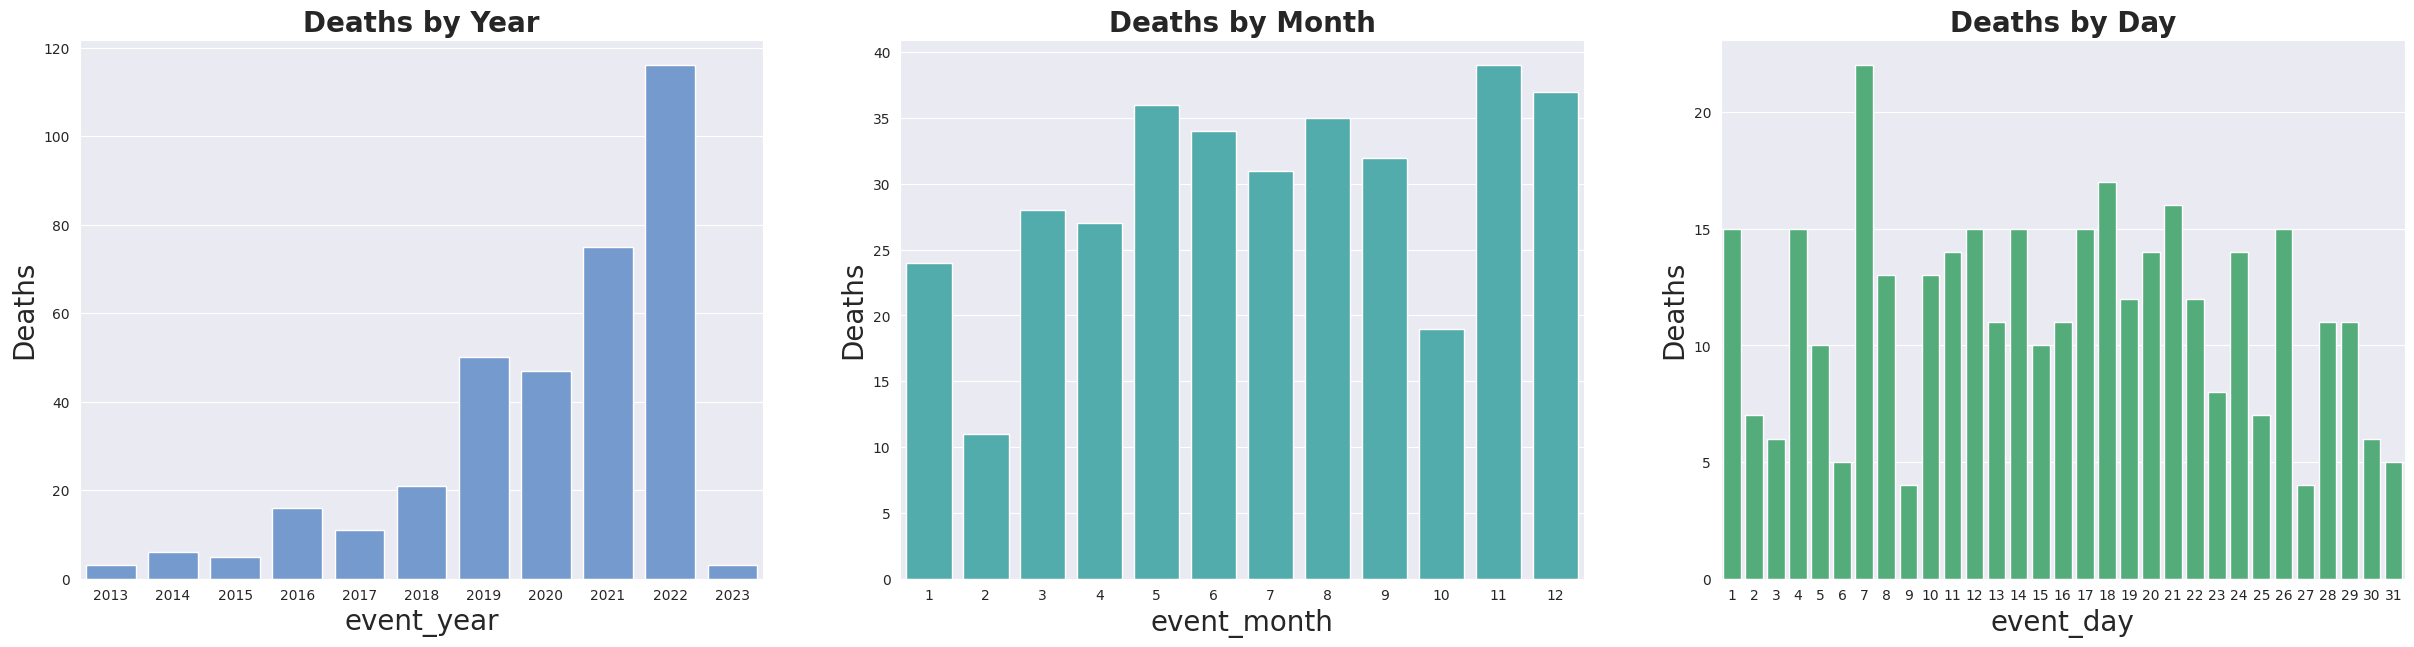

In [32]:
fig = plt.figure(figsize=(30, 7))
rows = 1
cols = 3
fontsize = 20

plot_bars(data=deaths_by_year.reset_index(),
                          x_label='event_year',
                          y_label='Deaths',
                          title='Deaths by Year',
                          rows=rows,
                          cols=cols,
                          plot_num=1,
                          color='#69D',
                          fontsize=fontsize)

plot_bars(data=deaths_by_month.reset_index(),
                          x_label='event_month',
                          y_label='Deaths',
                          title='Deaths by Month',
                          rows=rows,
                          cols=cols,
                          plot_num=2,
                          color='#4BB',
                          fontsize=fontsize)

plot_bars(data=deaths_by_day.reset_index(),
                          x_label='event_day',
                          y_label='Deaths',
                          title='Deaths by Day',
                          rows=rows,
                          cols=cols,
                          plot_num=3,
                          color='#4B7',
                          fontsize=fontsize)

**Observations**
1. There are more deaths in the year `2022`. Every year, deaths are increasing.
2. In month-wise data, more deaths happened in Novemebr and December.
3. There is no particular pattern in day-wise deaths data.

In [33]:
len(df['Country'].unique())

23

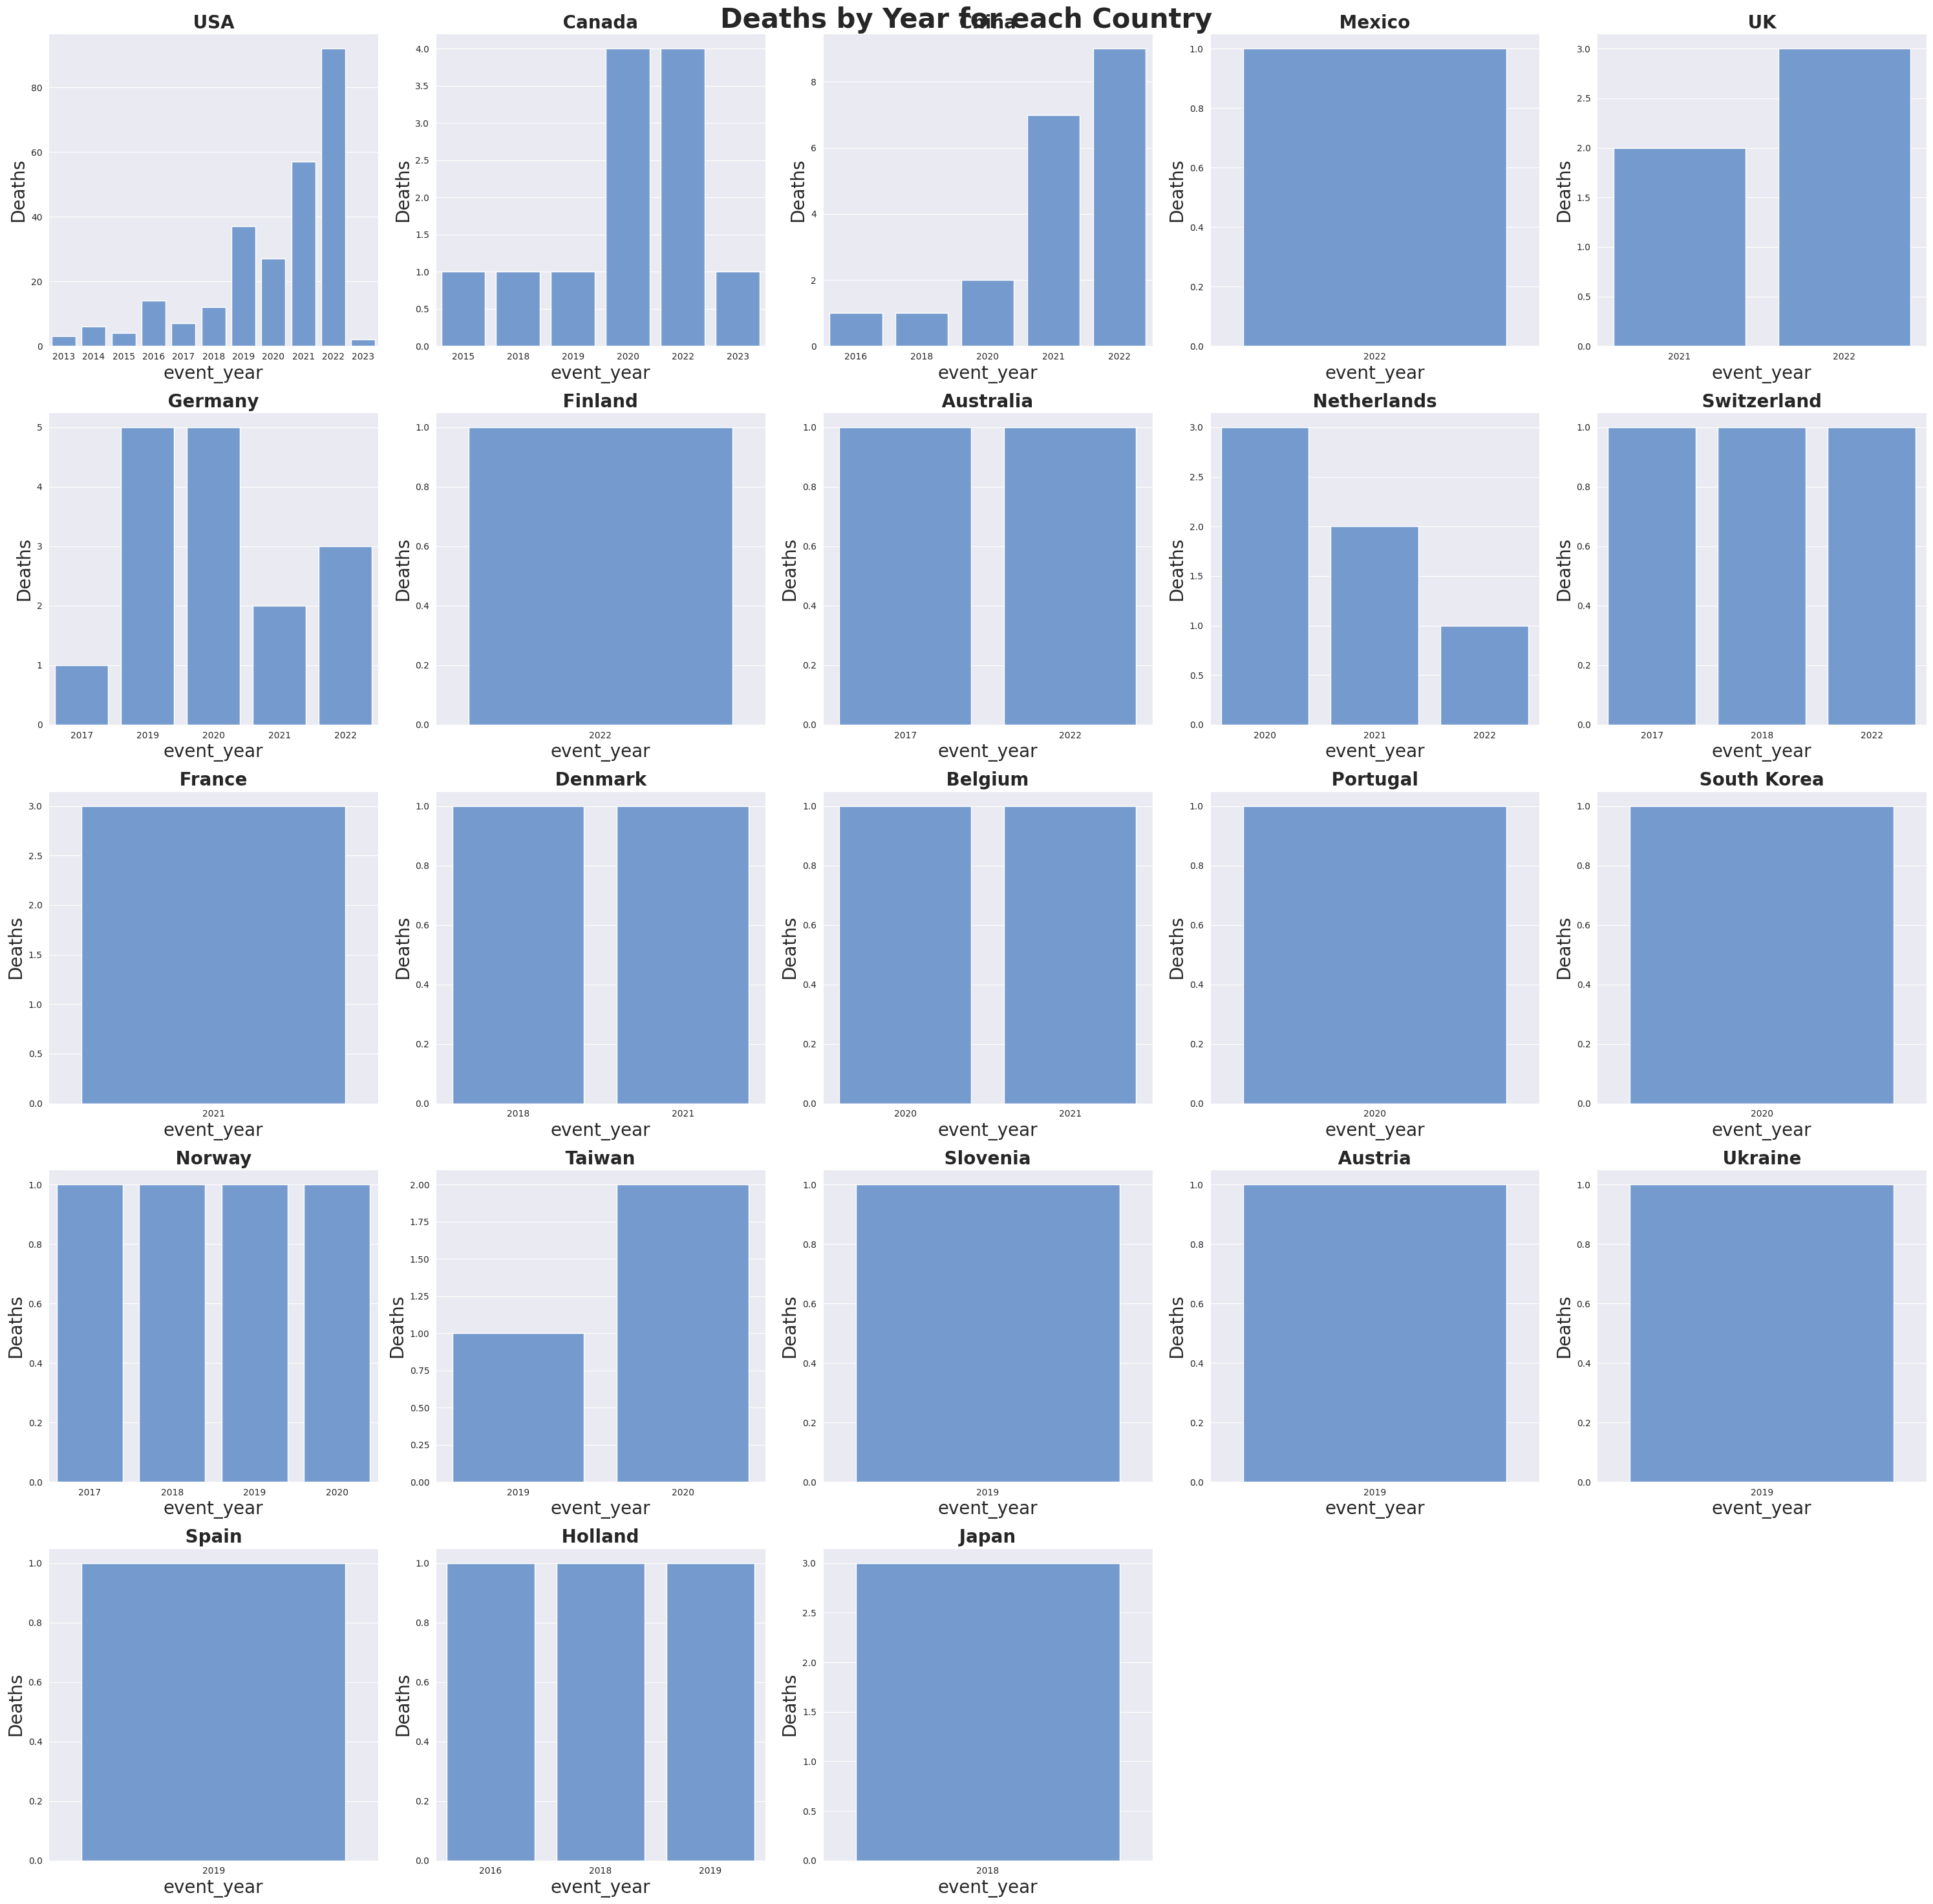

In [34]:
fig = plt.figure(figsize=(30, 30))
rows = 5
cols = 5
fontsize = 20

i = 1
for country in df['Country'].unique():
  deaths_by_year = df[df['Country'] == country].groupby('event_year').Deaths.sum()
  plot_bars(data=deaths_by_year.reset_index(),
                            x_label='event_year',
                            y_label='Deaths',
                            title=f'{country}',
                            rows=rows,
                            cols=cols,
                            plot_num=i,
                            color='#69D',
                            fontsize=fontsize)
  i = i+1

fig.suptitle("Deaths by Year for each Country", fontweight='bold', fontsize=30)
plt.tight_layout()
plt.show()

**Observations**
1. Only `USA` has deaths in all the years from `2013` to `2023`. This is due to more experimentation is carried in `USA`.
2. Next, significant deaths happened in `Canada`, `China` and `Germany.
3. Most of the countries have deaths in a single year only.

In [35]:
print(f"Total number of states: {len(df['State'].unique())}")

Total number of states: 43


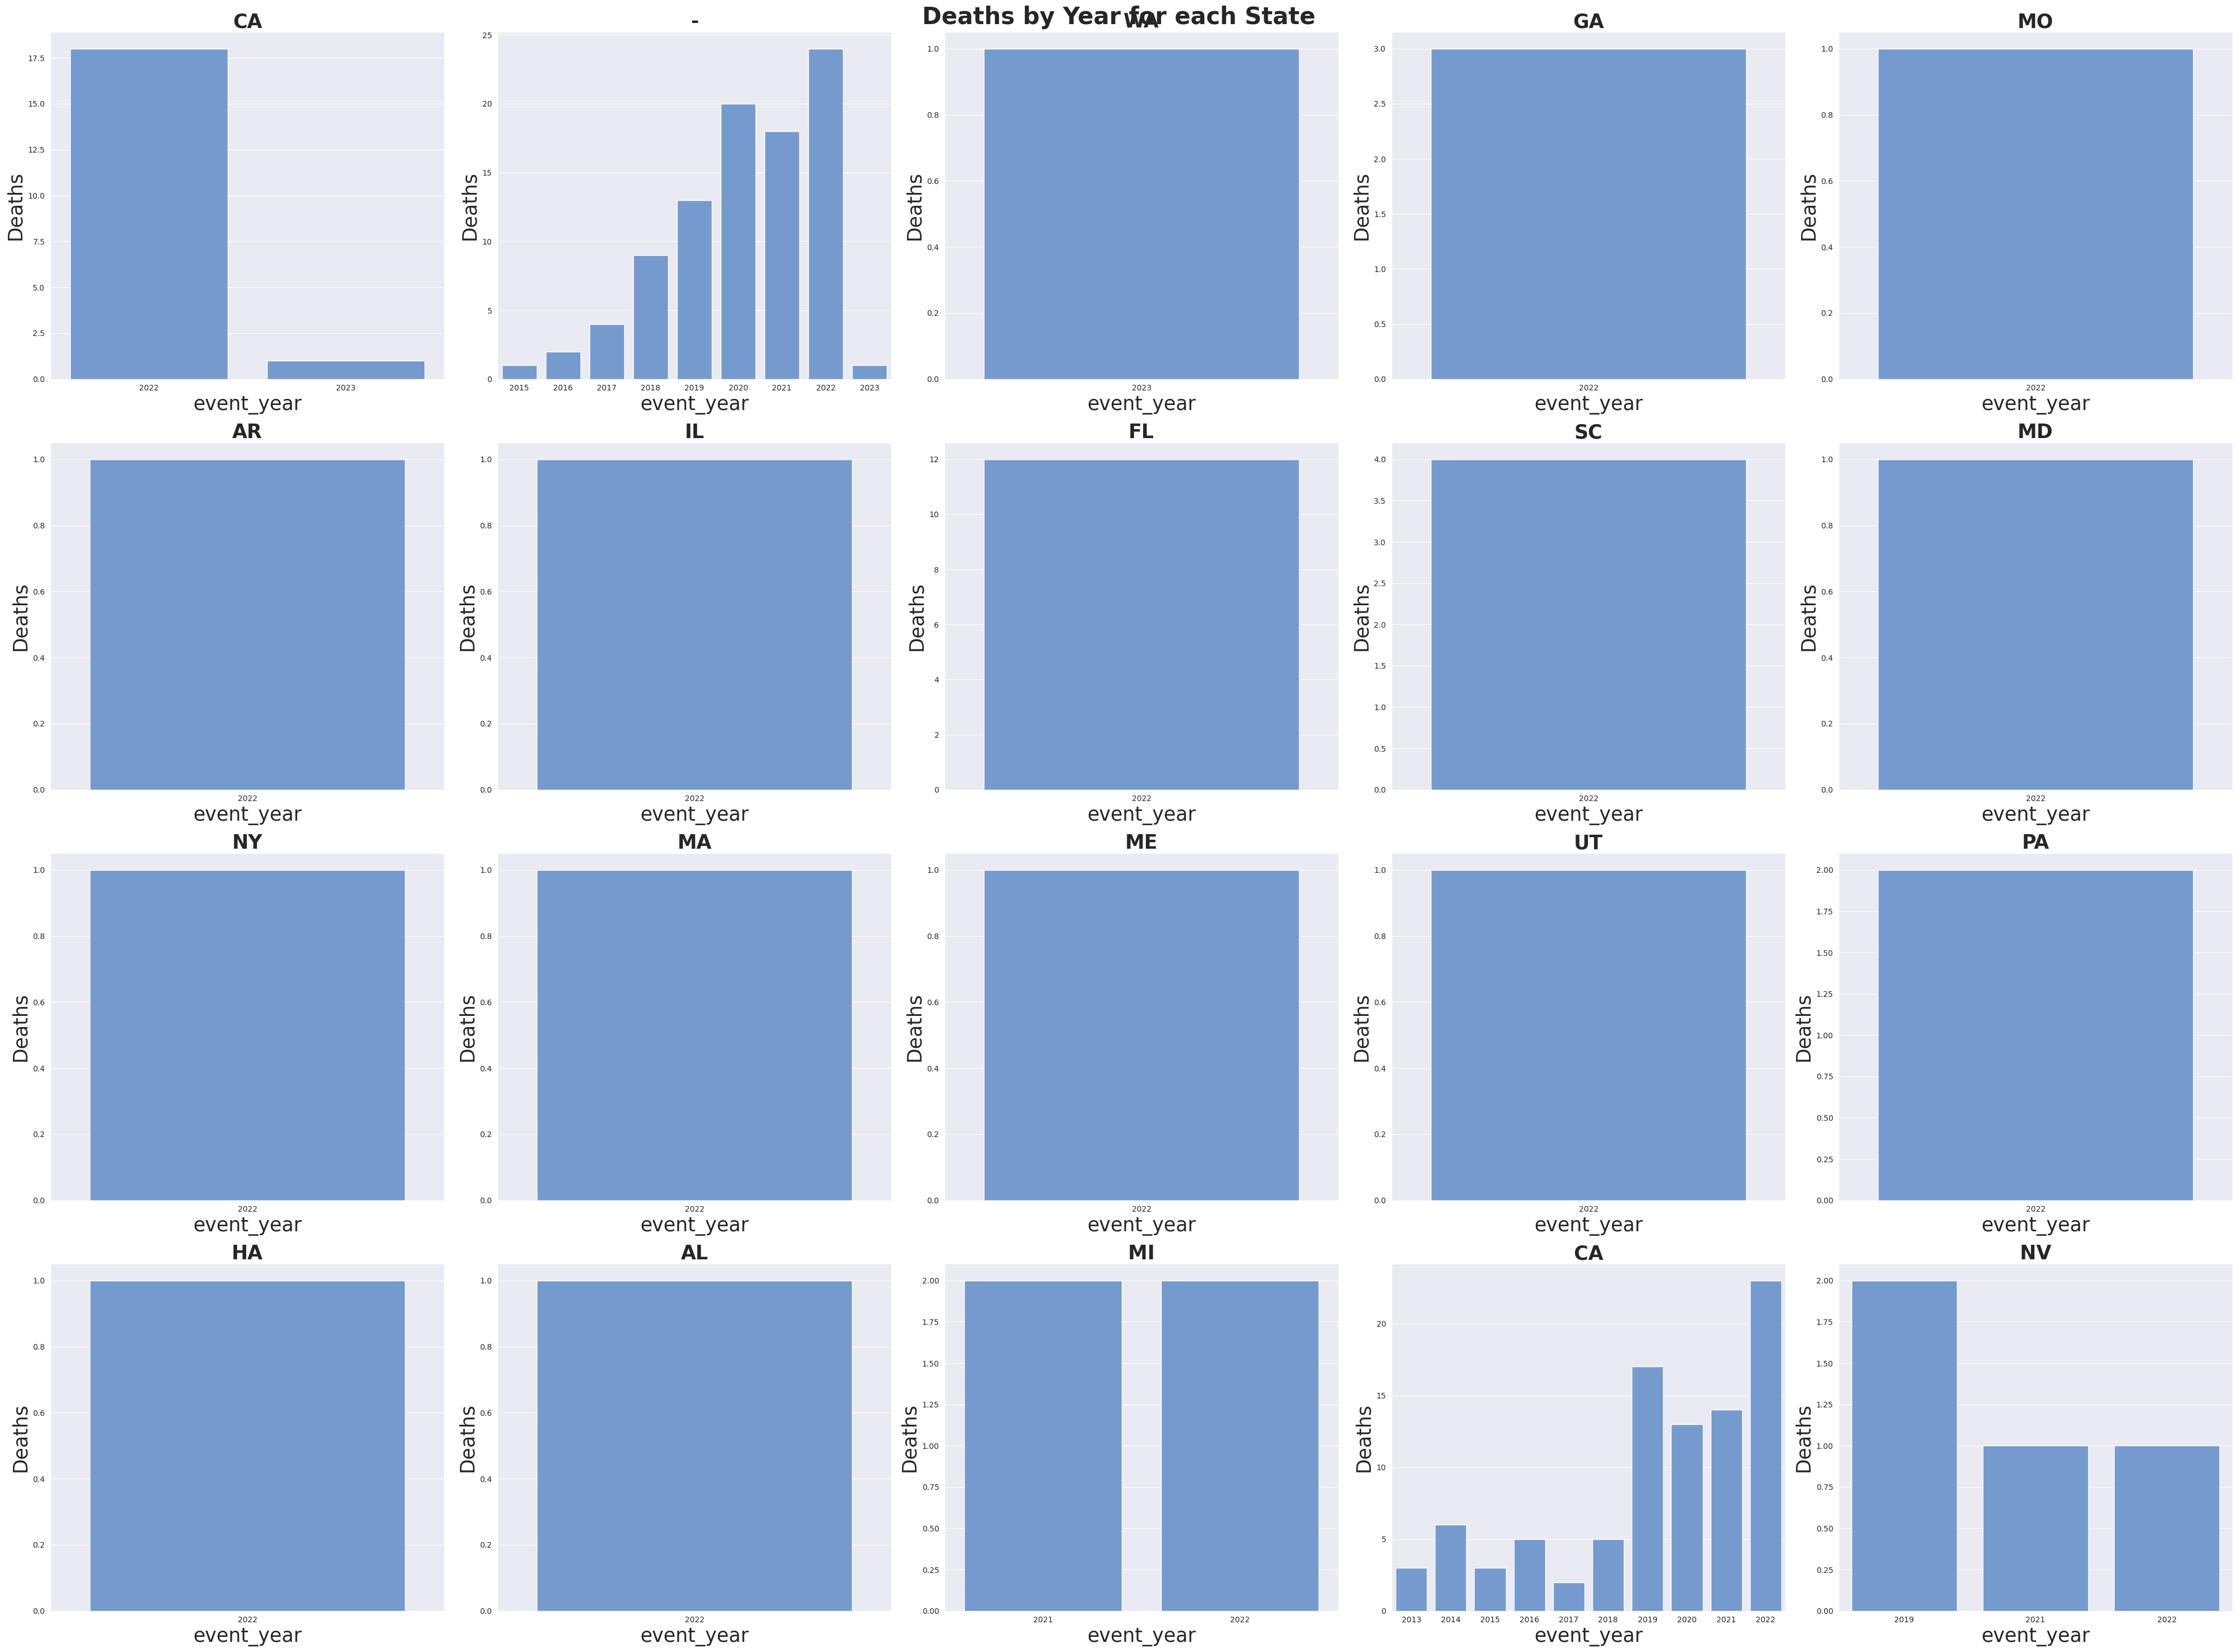

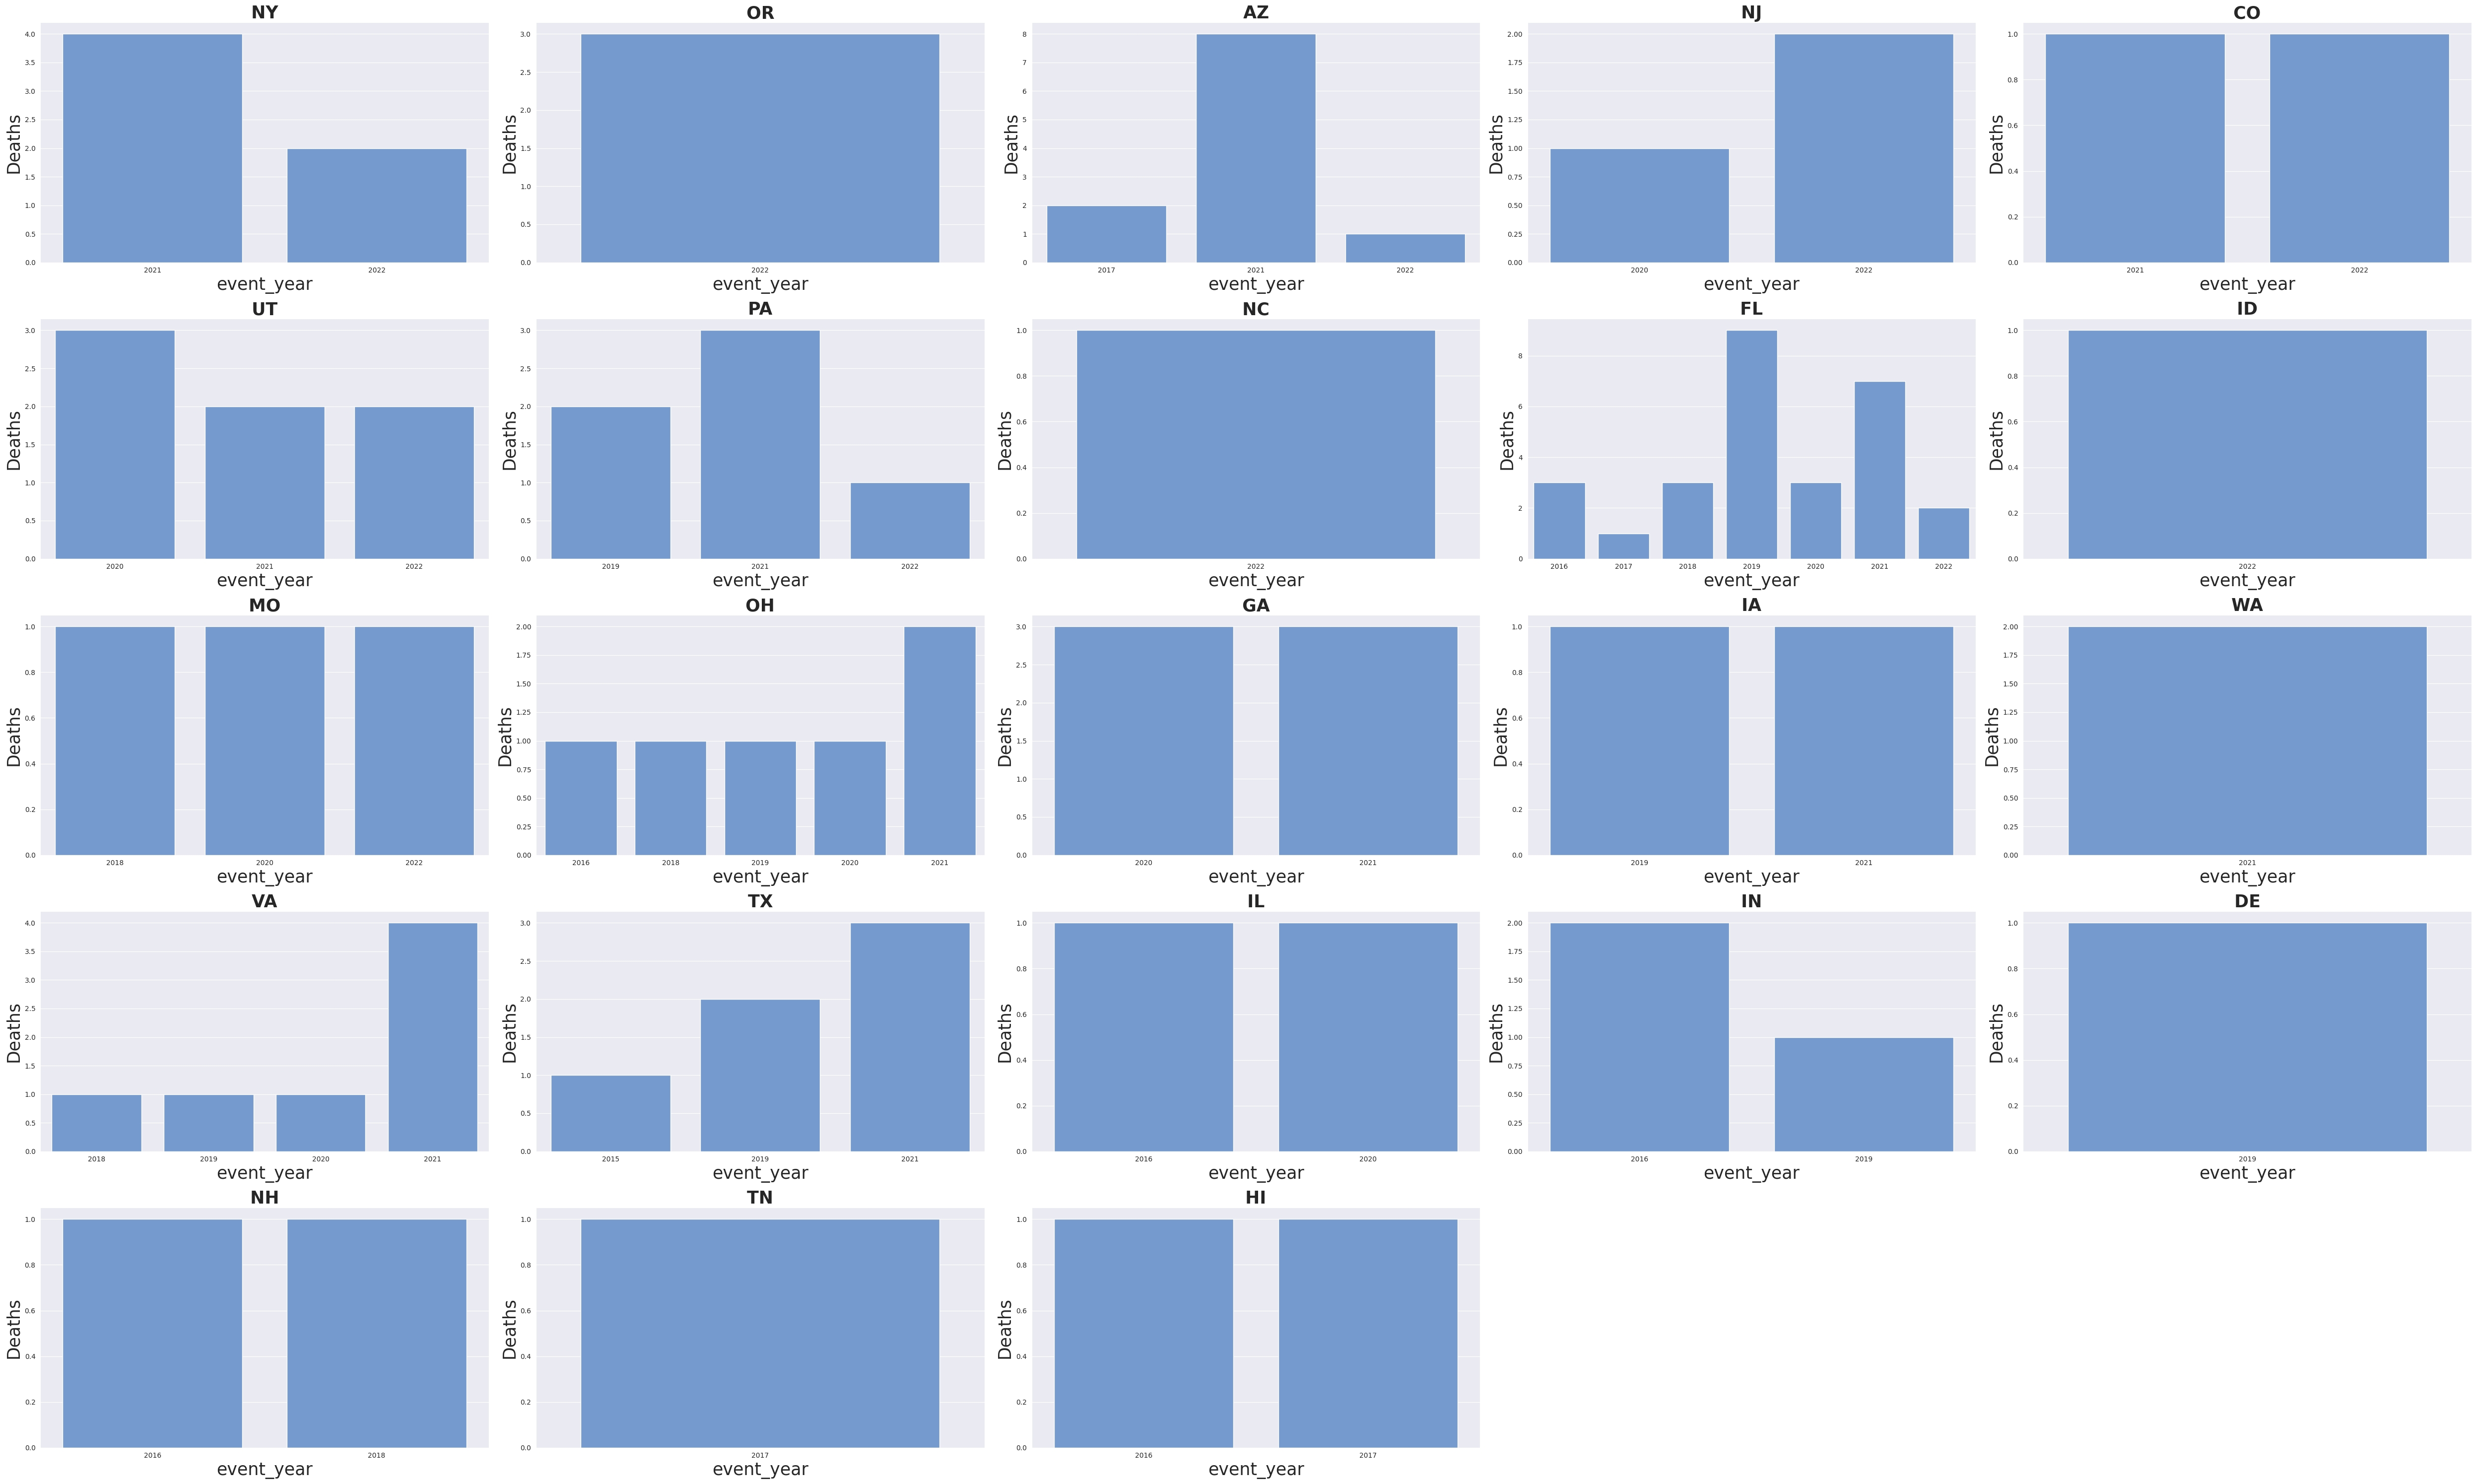

In [36]:
fig0 = plt.figure(figsize=(40, 30))
rows = 4
cols = 5
fontsize = 25

i = 1
for state in df['State'].unique():
  deaths_by_year = df[df['State'] == state].groupby('event_year').Deaths.sum()
  plot_bars(data=deaths_by_year.reset_index(),
                            x_label='event_year',
                            y_label='Deaths',
                            title=f'{state}',
                            rows=rows,
                            cols=cols,
                            plot_num=i,
                            color='#69D',
                            fontsize=fontsize)
  i = i+1
  if(i > 20): # It is beacuse more than 20 subplots can not be drawn
    break

fig0.suptitle("Deaths by Year for each State", fontweight='bold', fontsize=30)
plt.tight_layout()
plt.show()

fig1 = plt.figure(figsize=(50, 30))
rows = 5
cols = 5
fontsize = 25

i = 0
j = 1
for state in df['State'].unique():
  i = i+1
  if i <= 20:
    continue
  deaths_by_year = df[df['State'] == state].groupby('event_year').Deaths.sum()
  plot_bars(data=deaths_by_year.reset_index(),
                            x_label='event_year',
                            y_label='Deaths',
                            title=f'{state}',
                            rows=rows,
                            cols=cols,
                            plot_num=j,
                            color='#69D',
                            fontsize=fontsize)
  j = j+1
  if(j > 23):
    break

plt.tight_layout()
plt.show()

**Observation**
1. Most of the deaths happened in the state `CA`.

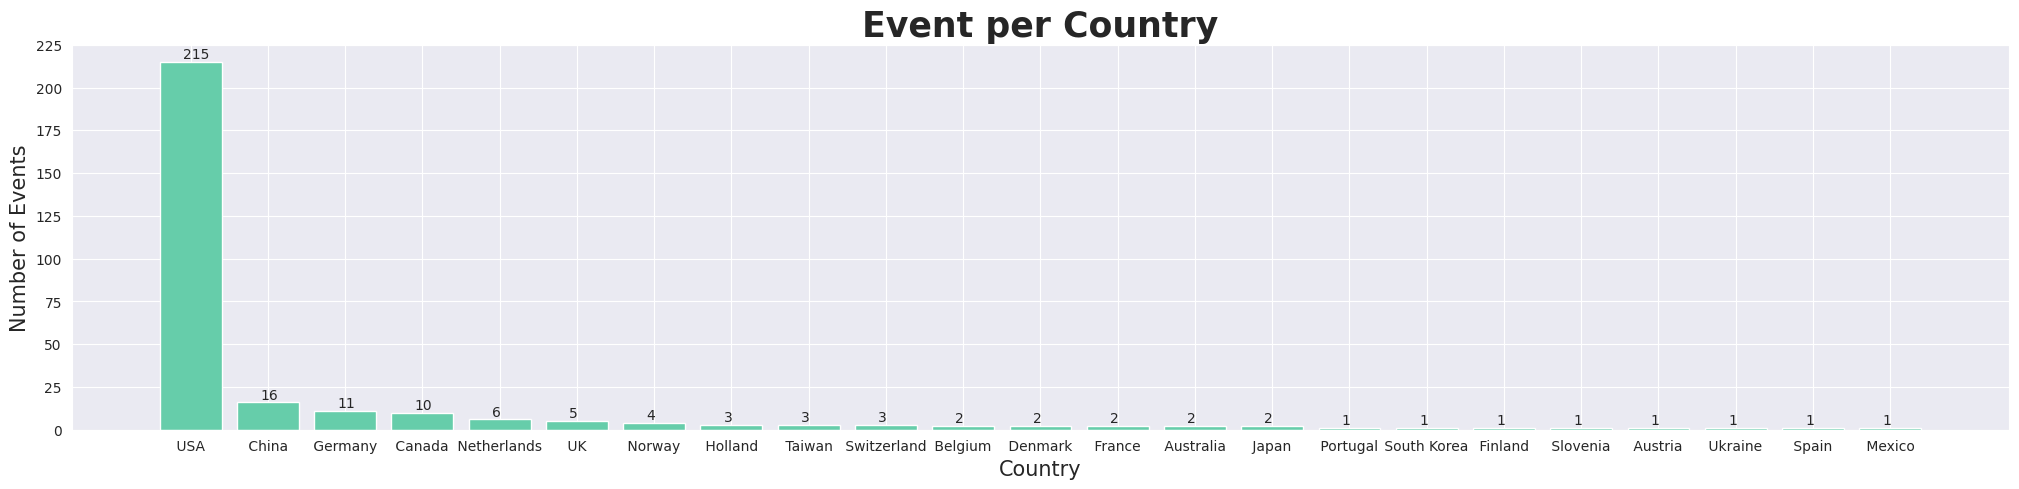

In [37]:
vc = df['Country'].value_counts()

plt.figure(figsize = (25,5))
plt.bar(height = vc.values, x = vc.index, color = "mediumaquamarine")
plt.xticks(vc.index, vc.index)

for i in range(len(vc.index)):
  plt.annotate(vc[i], xy = (i-0.1, vc[i]+2), size = 10)

plt.title("Event per Country", size = 25, fontweight = "bold")
plt.xlabel("Country", size = 15)
plt.ylabel("Number of Events", size = 15)
plt.ylim(0, 25 * round(vc.max()/25))
plt.show()

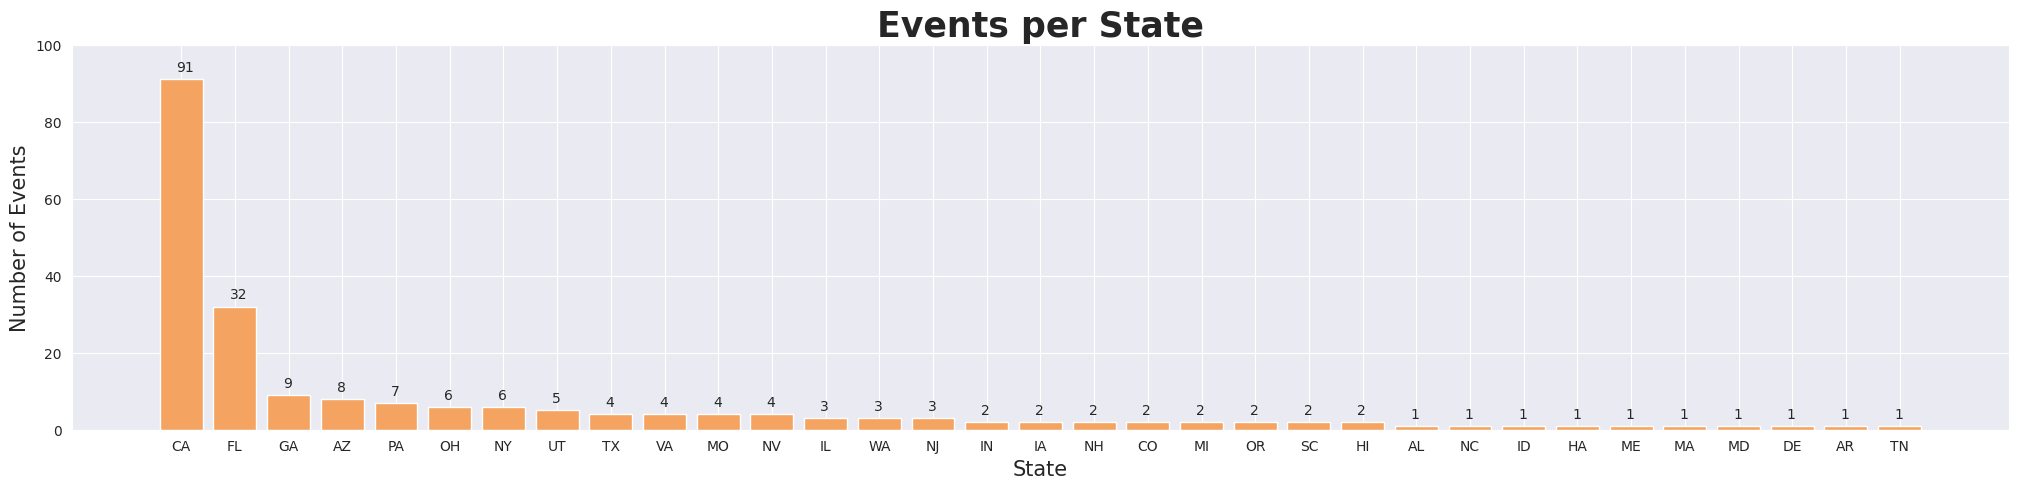

In [38]:
df['State'] = df['State'].str.strip()

vc = df['State'].value_counts()
vc = vc[vc.index != "-"]

plt.figure(figsize = (25,5))
plt.bar(height = vc.values, x = vc.index, color = "sandybrown")
plt.xticks(vc.index, vc.index)

for i in range(len(vc.index)):
  plt.annotate(vc[i], xy = (i-0.1, vc[i]+2), size = 10)

plt.title("Events per State", size = 25, fontweight = "bold")
plt.xlabel("State", size = 15)
plt.ylabel("Number of Events", size = 15)
plt.ylim(0, 25 * round(vc.max()/25))
plt.show()

### Analyze the different aspects of the death events.

This section focuses on exploring different aspects of death events.

> What is the number of victims (deaths) in each accident?

In [39]:
type_of_deaths = (df['Description'].value_counts()).reset_index()
type_of_deaths

,Description,count
0,Tesla kills pedestrian,10
1,Tesla kills motorcyclist,6
2,Tesla into oncoming traffic,5
3,Tesla rear ends stopped car,4
4,Tesla drives off cliff,4
...,...,...
243,Tesla crashes into trees,1
244,Multi-crash involving DUI,1
245,Tesla loses control and drives into river,1
246,Crash in public area including 20 injuries,1


In [40]:
import altair as alt
alt.Chart(type_of_deaths).mark_bar().encode(
    x='count',
    y='Description'
)


alt.Chart(...)

**Observation**

Number of deaths in most of the categories is `1`.

Let's inspect the categories in which deaths are more than `1`

In [41]:
type_of_deaths_more_than_1 = type_of_deaths[type_of_deaths['count'] > 1]
type_of_deaths_more_than_1

,Description,count
0,Tesla kills pedestrian,10
1,Tesla kills motorcyclist,6
2,Tesla into oncoming traffic,5
3,Tesla rear ends stopped car,4
4,Tesla drives off cliff,4
5,Tesla crashes into tree,3
6,Three car collision,3
7,Tesla hits pedestrian,3
8,Tesla hits motorcycle,3
9,Tesla drives off road,2


In [42]:
alt.Chart(type_of_deaths_more_than_1).mark_bar().encode(
    x='count',
    y='Description'
)

alt.Chart(...)

**Observation**

1. There are the highest deaths, i.e., `10` in ` Tesla kills pedestrian`.
2. And next, `Tesla kills motorcyclist` causes `6` deaths.
3. `Tesla into oncoming traffic`, `Tesla drives off cliff`, and `Tesla rear ends Ford` cause `5`, `4` and `4` deaths respectively.

> How many times did tesla drivers die?

In [43]:
df['Tesla driver'].value_counts()

Tesla driver
0    177
1    117
Name: count, dtype: int64

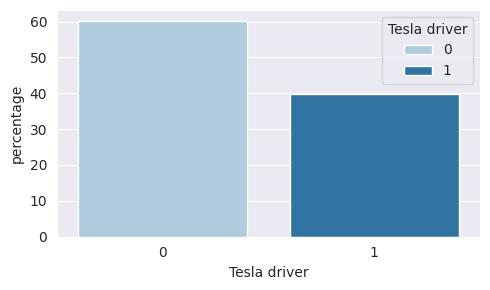

In [44]:
fig = plt.figure(figsize=(5, 3))
sns.barplot(x='Tesla driver', y='Tesla driver', data=df, hue='Tesla driver', estimator=lambda x: len(x) / len(df) * 100, palette='Paired', errorbar=None)
plt.ylabel('percentage')
plt.tight_layout()

**Observation**
1. In total of `294`, `Tesla driver` has died `117` times, which is `40%` of the times.

> What is the proportion of events in which one or more occupants died?

In [45]:
df['Tesla occupant'].value_counts()

Tesla occupant
0    251
1     39
2      3
3      1
Name: count, dtype: int64

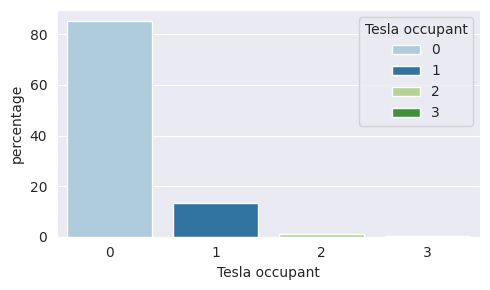

In [46]:
fig = plt.figure(figsize=(5, 3))
sns.barplot(x='Tesla occupant', y='Tesla occupant', data=df, hue='Tesla occupant', estimator=lambda x: len(x) / len(df) * 100, palette='Paired', errorbar=None)
plt.ylabel('percentage')
plt.tight_layout()

**Observation**

`Tesla occupants` have not died in most of the events, i.e., more than `80%`.

> What is the distribution of events in which the vehicle hit a cyclist or a pedestrian?

> How many times did the accident involve the death of an occupant or driver of a Tesla along with a cyclist or pedestrian?

> What is the frequency of Tesla colliding with other vehicles?

In [47]:
df['Description'] = df['Description'].str.strip()

In [48]:
df[df['Description'] == 'Tesla hits cyclist']

,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,event_year,event_month,event_day
41,2022,2022-07-27,Canada,-,Tesla hits cyclist,1,0,0,0,1,1,-,0,0,2022,7,27


In [49]:
df[df['Description'] == 'Tesla hits pedestrian']

,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths,event_year,event_month,event_day
12,2022,2022-11-26,USA,AR,Tesla hits pedestrian,1,0,0,0,1,1,-,0,0,2022,11,26
66,2022,2022-05-21,China,-,Tesla hits pedestrian,1,0,0,0,1,1,-,0,0,2022,5,21
69,2022,2022-05-18,USA,CA,Tesla hits pedestrian,1,0,0,0,1,1,3,1,0,2022,5,18


In [50]:
col_list = ['Deaths', 'Tesla driver','Tesla occupant', 'Other vehicle', 'Cyclists/ Peds', 'TSLA+cycl / peds']

In [51]:
colr = ['salmon', 'mediumaquamarine', 'mediumpurple', 'goldenrod', 'silver', 'saddlebrown']

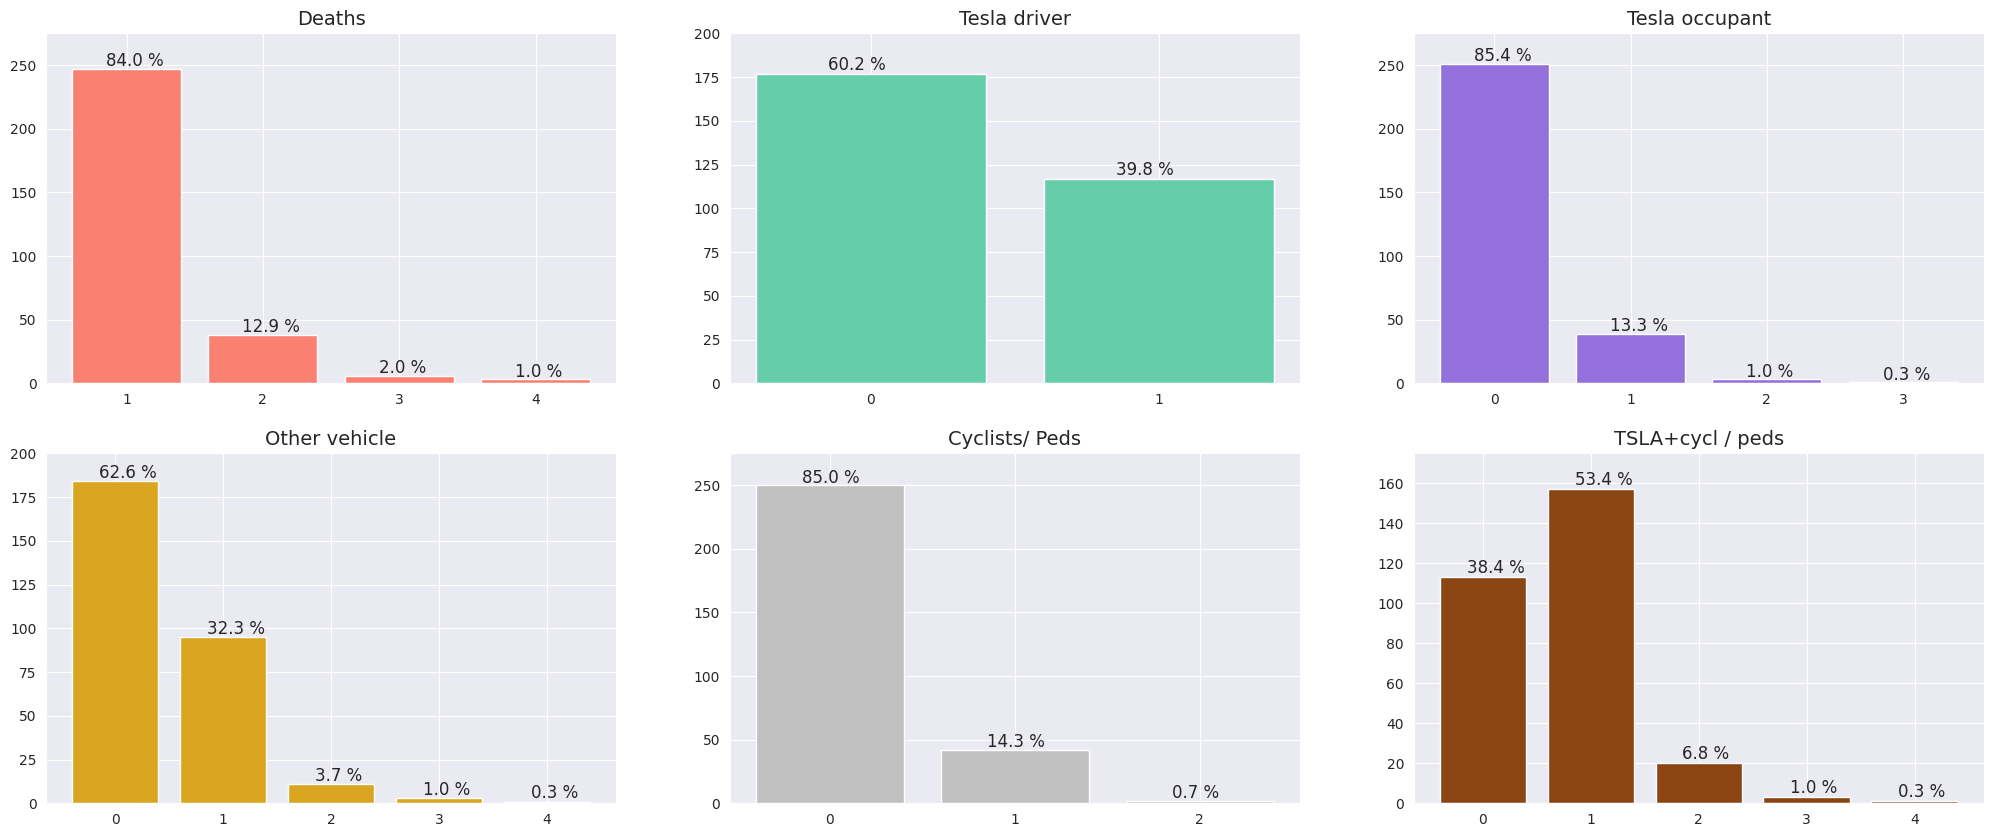

In [52]:
f,ax = plt.subplots(2,3, figsize = (25,10))
i,j,k = 0,0,0
for col in col_list:
  vc = df[col].value_counts()
  vc = vc.sort_index()
  perc = (vc/vc.sum()*100).round(1)
  #print(vc)
  ax[i,j].bar(x = vc.index, height = vc.values, color = colr[k])
  ax[i,j].set_title(col.replace("_", " "), size = 14)
  ax[i,j].set_xticks(vc.index)
  for l in vc.index:
    #print(l)
    ax[i,j].annotate("{} %".format(perc[l]), xy = (l-0.15,vc[l]+2), size = 12)
    ax[i,j].set_ylim(0,  25 * round(vc.max()/25)+25)
  j += 1
  k += 1
  if j == 3:
    j = 0
    i += 1

### Study the event distribution across models

In [53]:
df['Model'] = df['Model'].str.strip()
df['Model'] = df['Model'].replace("-", "0")

In [54]:
df['Model'].value_counts()

Model
0    181
S     45
3     39
X     17
Y     10
1      1
2      1
Name: count, dtype: int64

Since currently there are only 4 existing models `S`, `X`, `Y` and `3`, we will analyse them only.

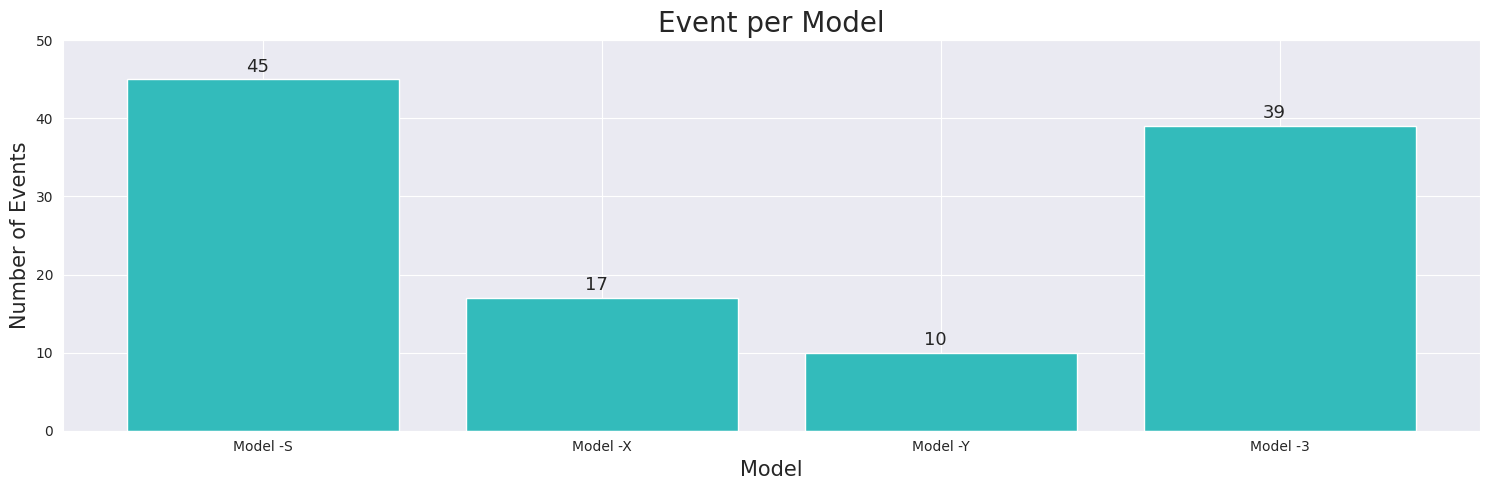

In [55]:
vc = df['Model'].value_counts()
vc = vc[["S", "X", "Y", "3"]]

plt.figure(figsize = (15,5))
plt.bar(height = vc.values, x = vc.index, color = "#3BB")
plt.xticks(vc.index, "Model -"+ vc.index.astype(str))

for i in range(len(vc.index)):
  plt.annotate(vc[i], xy = (i-0.05, vc[i]+1), size = 13)

plt.title("Event per Model", size = 20)
plt.xlabel("Model", size = 15)
plt.ylabel("Number of Events", size = 15)
plt.ylim(0, 25 * round(vc.max()/25))

plt.tight_layout()
plt.show()

### Check the distribution of verified Tesla autopilot deaths

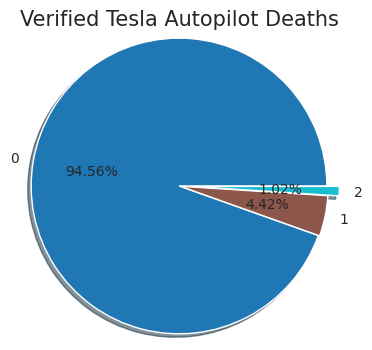

In [56]:
vc = df['Verified Tesla Autopilot Deaths'].value_counts()
plt.figure(figsize = (5,4))
vc.plot.pie(radius = 1.2, autopct = "%1.2f%%", shadow = True, wedgeprops = {'edgecolor':"white"}, cmap = 'tab10',
            explode = [0.001, 0.01,0.1])
plt.ylabel("")
plt.title("Verified Tesla Autopilot Deaths", pad = 5, size = 15)
plt.show()